In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt



In [2]:
# Load dataset
data = pd.read_csv('Train.csv')
data

ID Warehouse_block Mode_of_Shipment  Customer_care_calls  \
0          1               D           Flight                    4   
1          2               F           Flight                    4   
2          3               A           Flight                    2   
3          4               B           Flight                    3   
4          5               C           Flight                    2   
...      ...             ...              ...                  ...   
10994  10995               A             Ship                    4   
10995  10996               B             Ship                    4   
10996  10997               C             Ship                    5   
10997  10998               F             Ship                    5   
10998  10999               D             Ship                    2   

       Customer_rating  Cost_of_the_Product  Prior_purchases  \
0                    2                  177                3   
1                    5                  216                2   
2                    2                  183                4   
3                    3                  176                4   
4                    2                  184                3   
...                ...                  ...              ...   
10994                1                  252                5   
10995                1                  232                5   
10996                4                  242                5   
10997                2                  223                6   
10998                5                  155                5   

      Product_importance Gender  Discount_offered  Weight_in_gms  \
0                    low      F                44           1233   
1                    low      M                59           3088   
2                    low      M                48           3374   
3                 medium      M                10           1177   
4                 medium      F                46           2484   
...                  ...    ...               ...            ...   
10994             medium      F                 1           1538   
10995             medium      F                 6           1247   
10996                low      F                 4           1155   
10997             medium      M                 2           1210   
10998                low      F                 6           1639   

       Reached.on.Time_Y.N  
0                        1  
1                        1  
2                        1  
3                        1  
4                        1  
...                    ...  
10994                    1  
10995                    0  
10996                    0  
10997                    0  
10998                    0  

[10999 rows x 12 columns]

In [4]:
# Load dataset
data = pd.read_csv('Train.csv')



# Summary statistics for numerical features
print(data.describe())




                ID  Customer_care_calls  Customer_rating  Cost_of_the_Product  \
count  10999.00000         10999.000000     10999.000000         10999.000000   
mean    5500.00000             4.054459         2.990545           210.196836   
std     3175.28214             1.141490         1.413603            48.063272   
min        1.00000             2.000000         1.000000            96.000000   
25%     2750.50000             3.000000         2.000000           169.000000   
50%     5500.00000             4.000000         3.000000           214.000000   
75%     8249.50000             5.000000         4.000000           251.000000   
max    10999.00000             7.000000         5.000000           310.000000   

       Prior_purchases  Discount_offered  Weight_in_gms  Reached.on.Time_Y.N  
count     10999.000000      10999.000000   10999.000000         10999.000000  
mean          3.567597         13.373216    3634.016729             0.596691  
std           1.522860         16

   ID Warehouse_block Mode_of_Shipment  Customer_care_calls  Customer_rating  \
0   1               D           Flight                    4                2   
1   2               F           Flight                    4                5   
2   3               A           Flight                    2                2   
3   4               B           Flight                    3                3   
4   5               C           Flight                    2                2   

   Cost_of_the_Product  Prior_purchases Product_importance Gender  \
0                  177                3                low      F   
1                  216                2                low      M   
2                  183                4                low      M   
3                  176                4             medium      M   
4                  184                3             medium      F   

   Discount_offered  Weight_in_gms  Reached.on.Time_Y.N  Total_Interaction  \
0                44       

C:\Users\Yash Singh\AppData\Local\Temp\ipykernel_19720\3891312960.py:15: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  data = data.fillna(method='ffill')


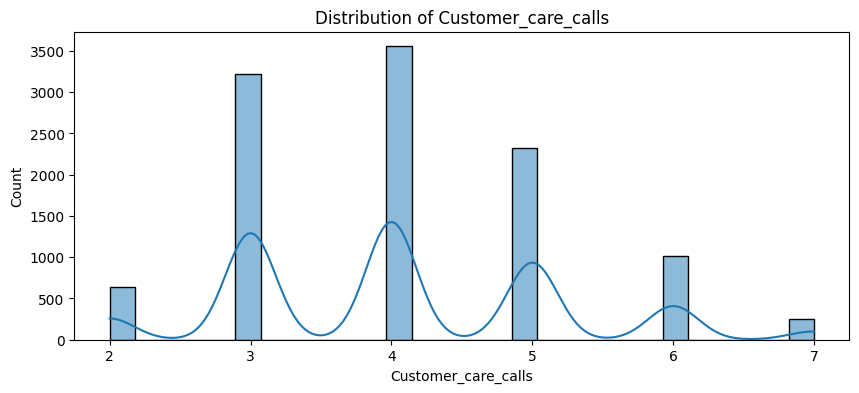

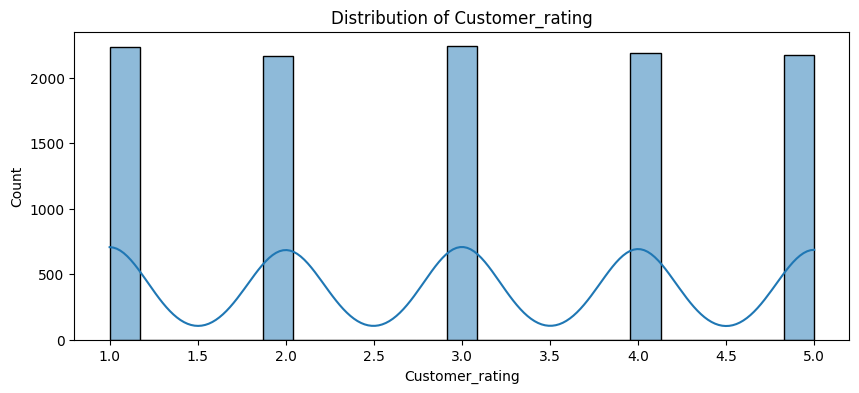

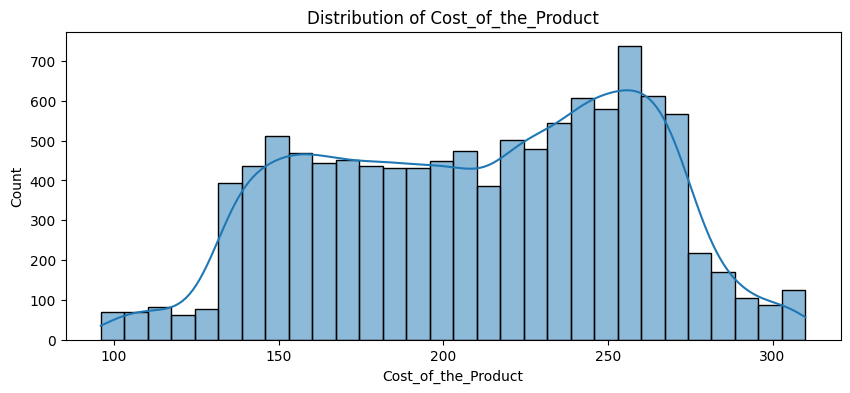

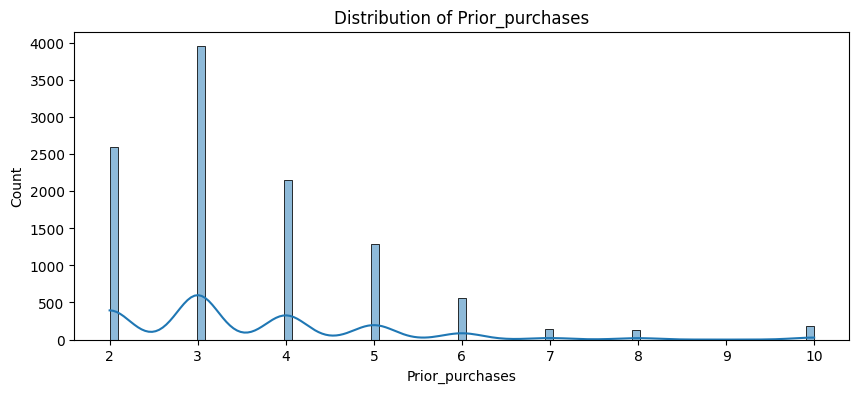

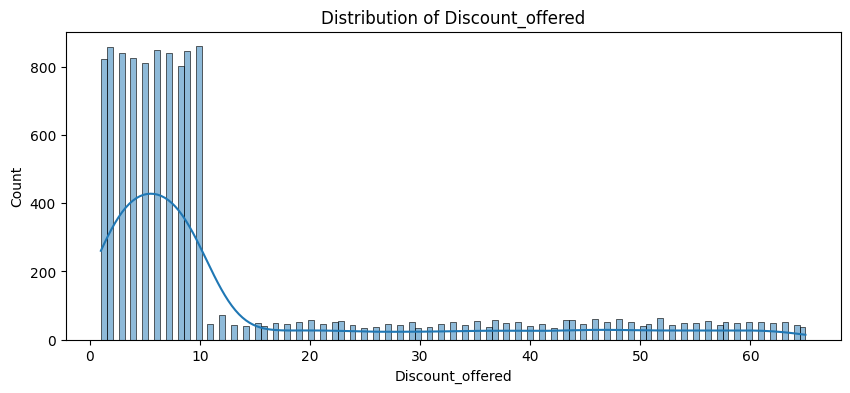

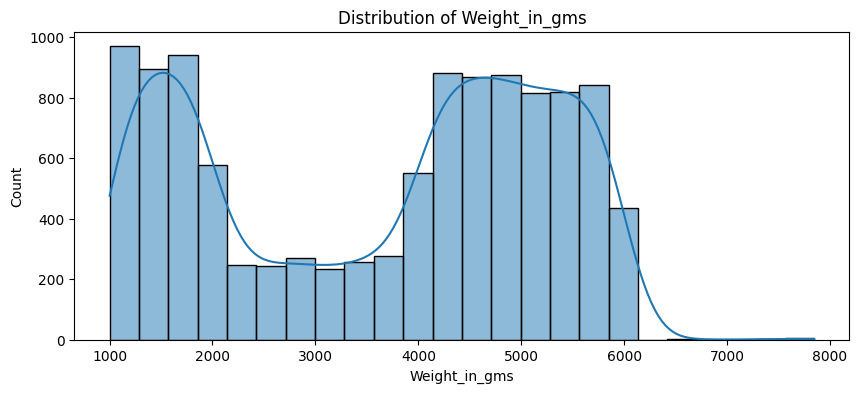

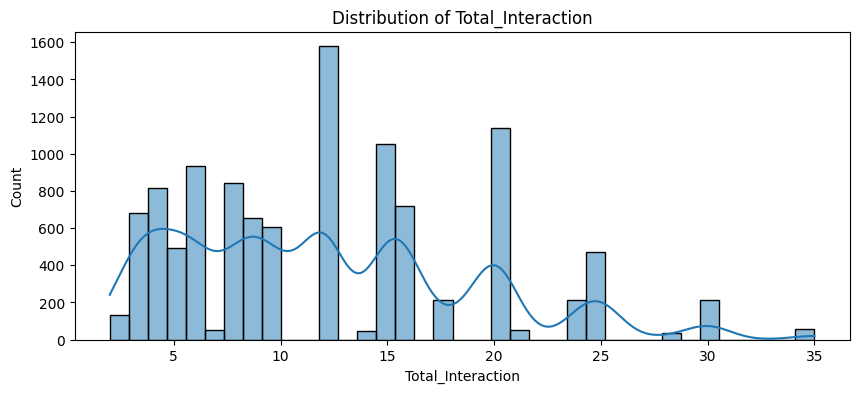

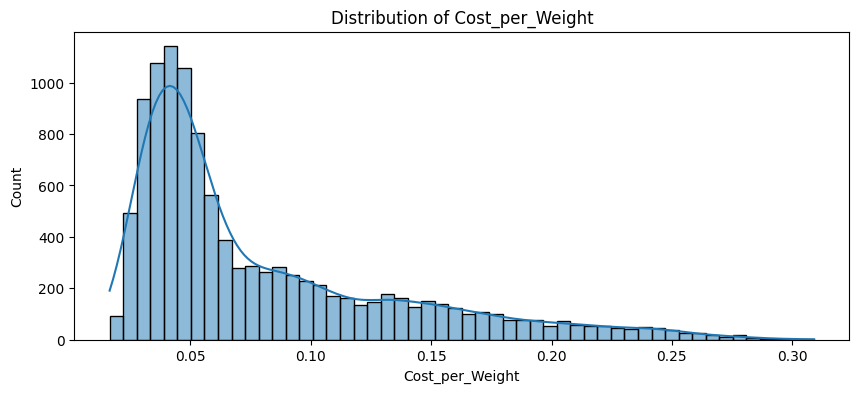

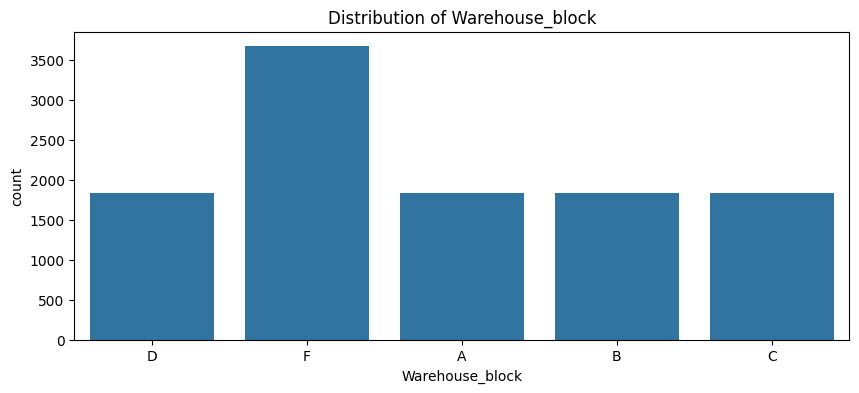

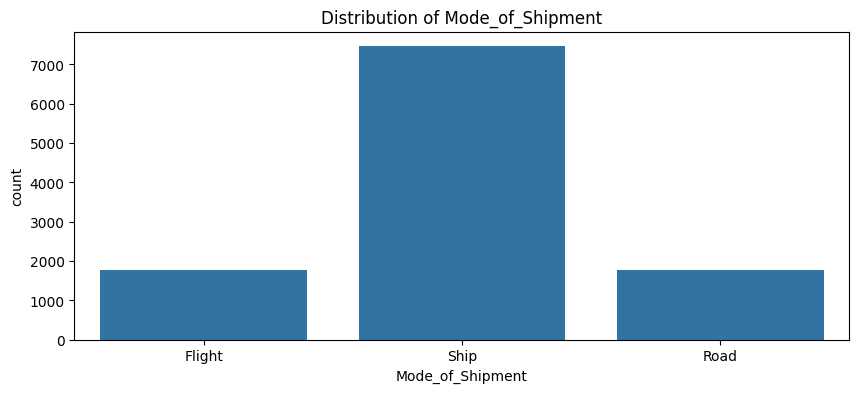

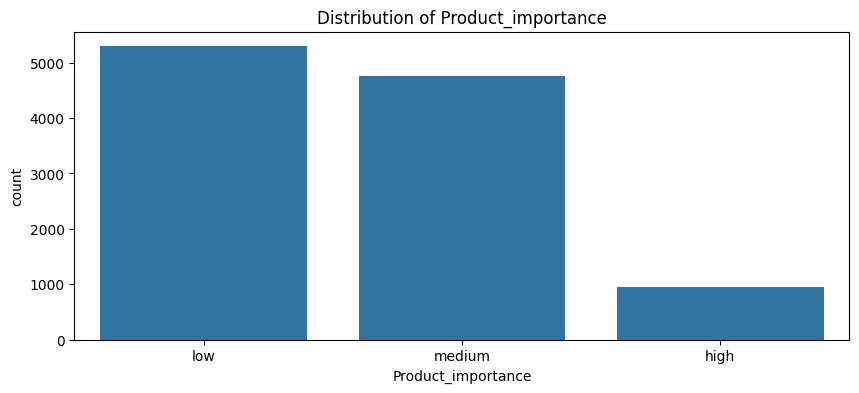

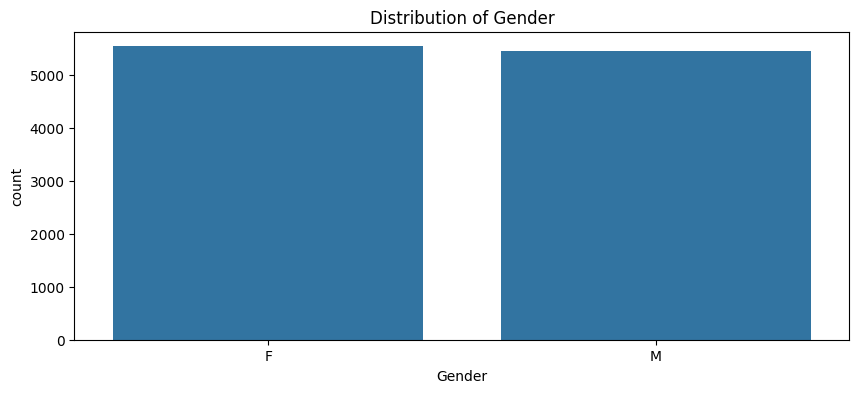

In [6]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
import numpy as np

# Load dataset
data = pd.read_csv('Train.csv')

# Feature engineering
data['Total_Interaction'] = data['Customer_care_calls'] * data['Customer_rating']
data['Cost_per_Weight'] = data['Cost_of_the_Product'] / data['Weight_in_gms']

# Data preprocessing
data = data.fillna(method='ffill')

# Data Overview
print(data.head())
print(data.info())
print(data.isnull().sum())
print(data.describe())
print(data.describe(include=['O']))

# Univariate Analysis
numerical_features = ['Customer_care_calls', 'Customer_rating', 'Cost_of_the_Product', 'Prior_purchases', 'Discount_offered', 'Weight_in_gms', 'Total_Interaction', 'Cost_per_Weight']
categorical_features = ['Warehouse_block', 'Mode_of_Shipment', 'Product_importance', 'Gender']

for feature in numerical_features:
    plt.figure(figsize=(10, 4))
    sns.histplot(data[feature], kde=True)
    plt.title(f'Distribution of {feature}')
    plt.show()

for feature in categorical_features:
    plt.figure(figsize=(10, 4))
    sns.countplot(x=feature, data=data)
    plt.title(f'Distribution of {feature}')
    plt.show()


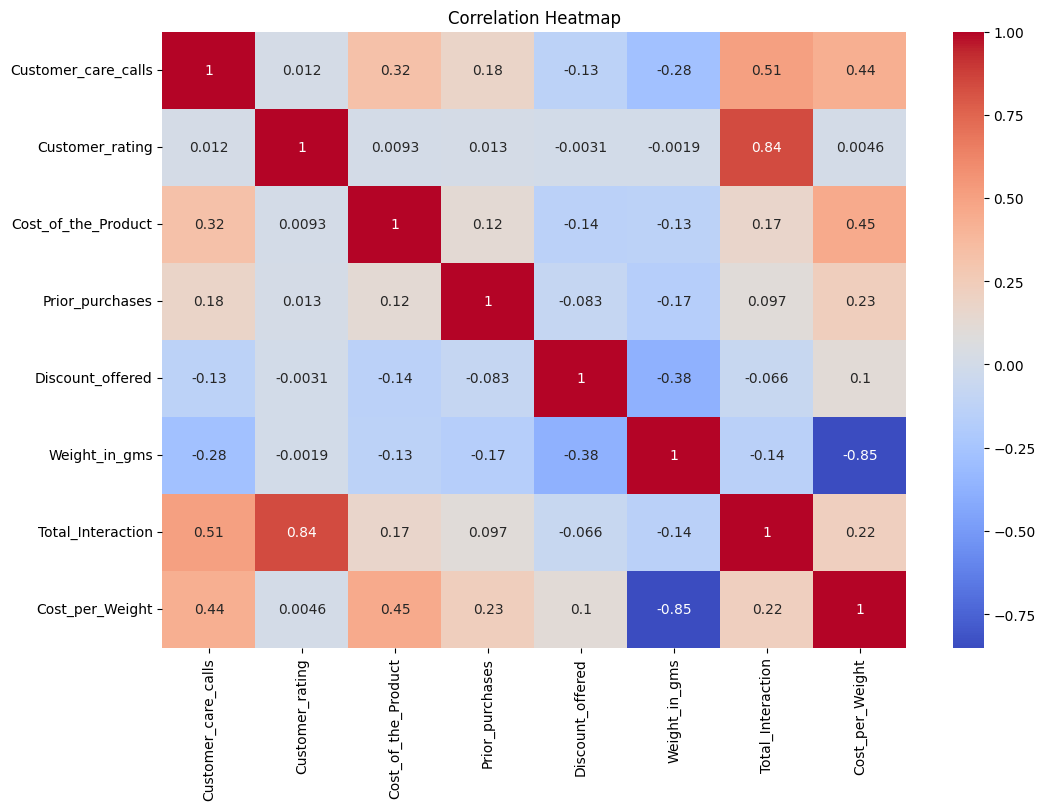

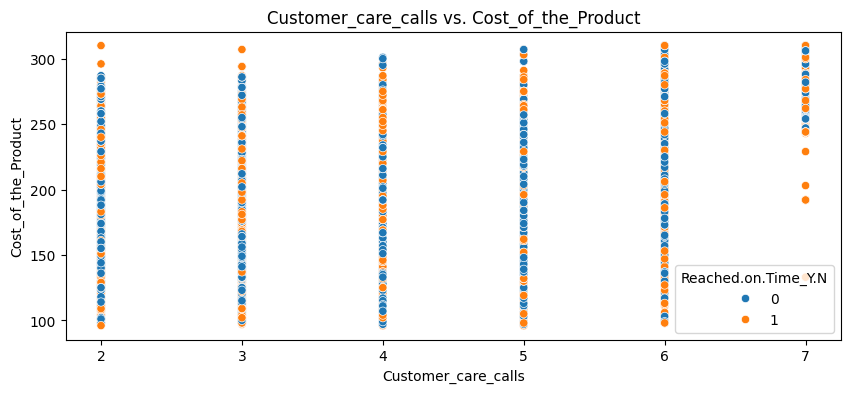

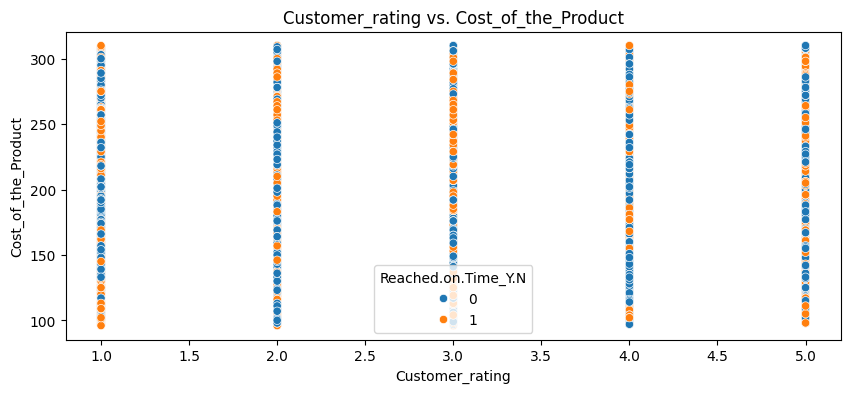

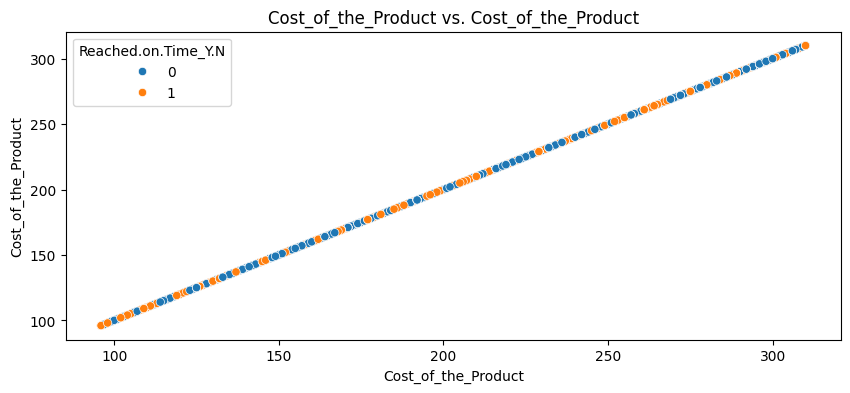

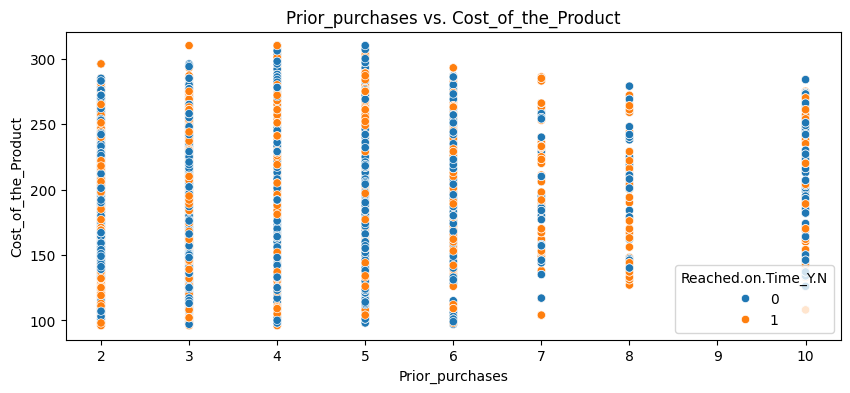

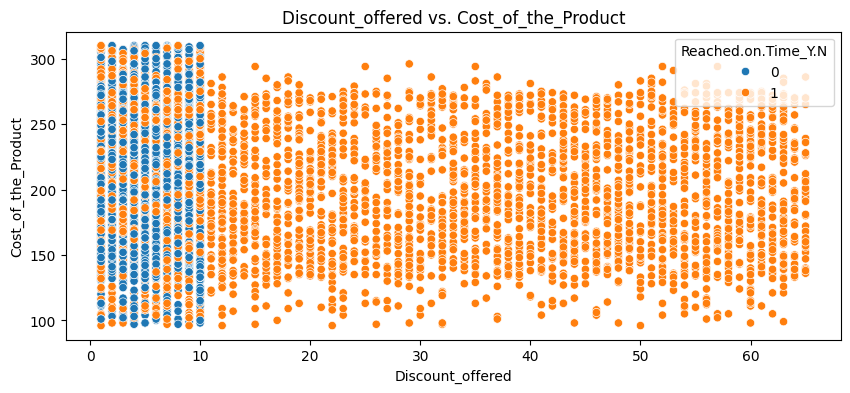

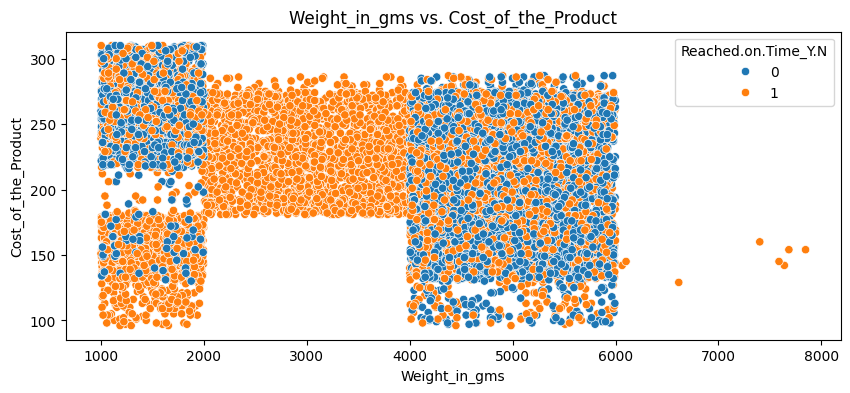

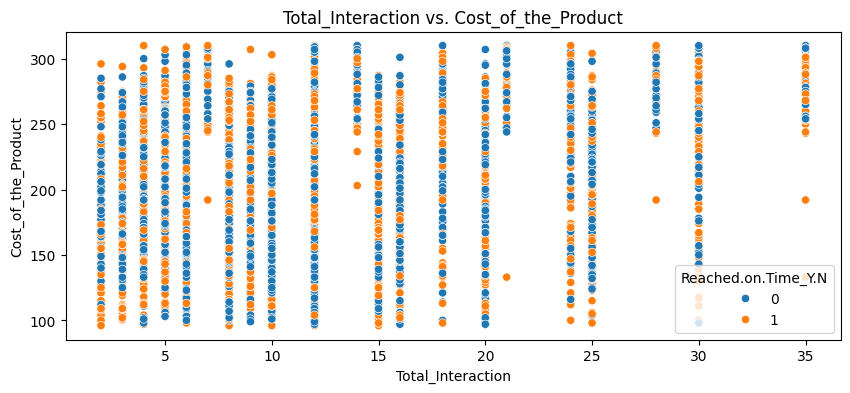

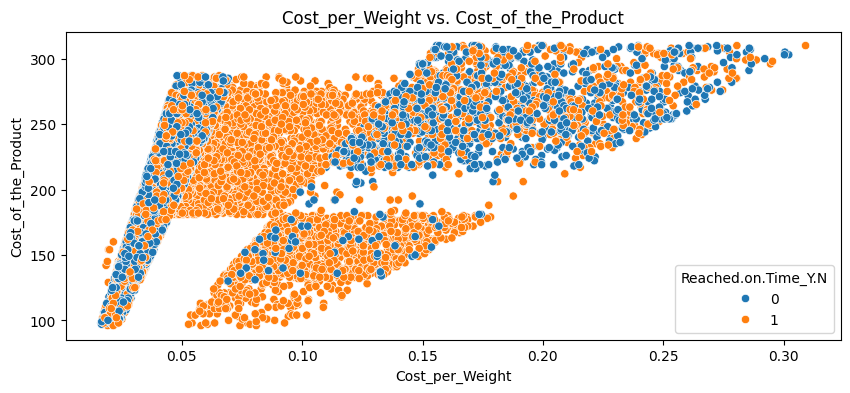

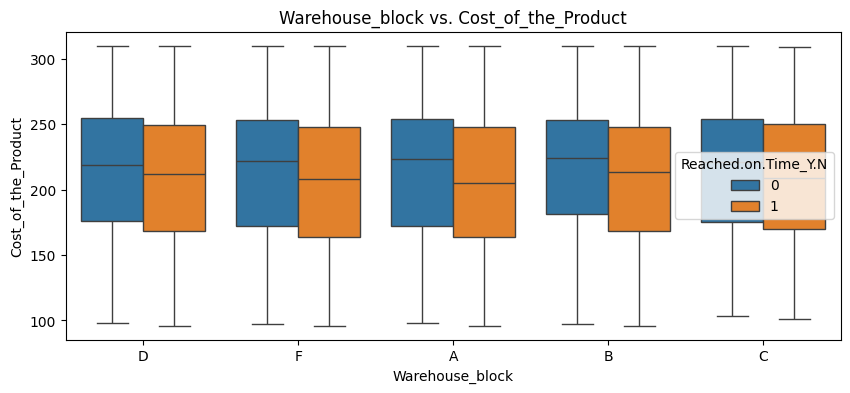

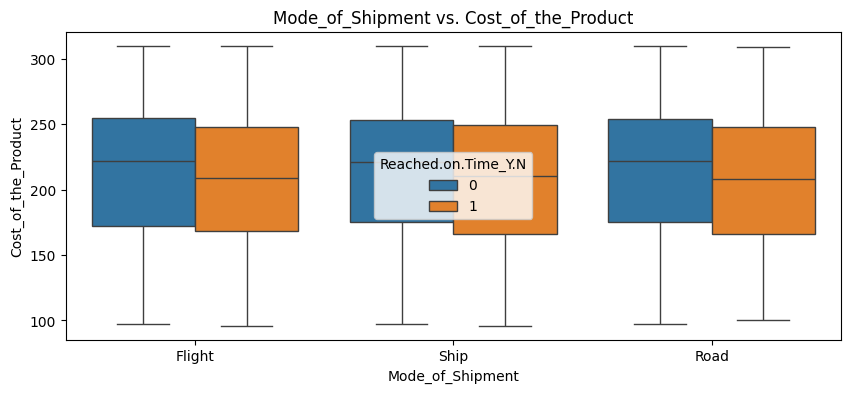

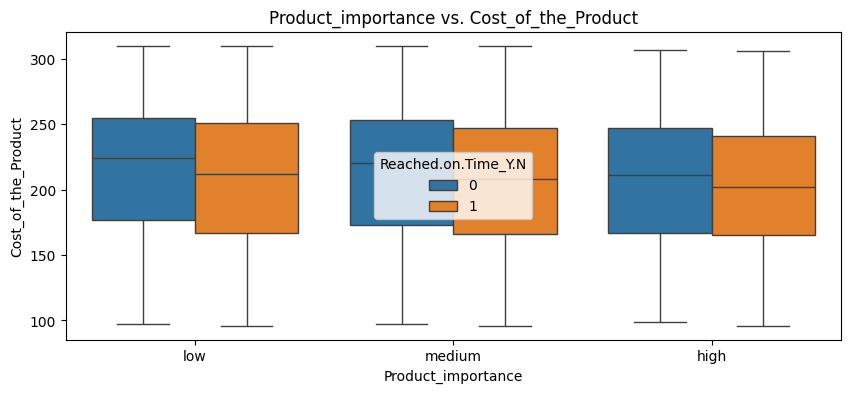

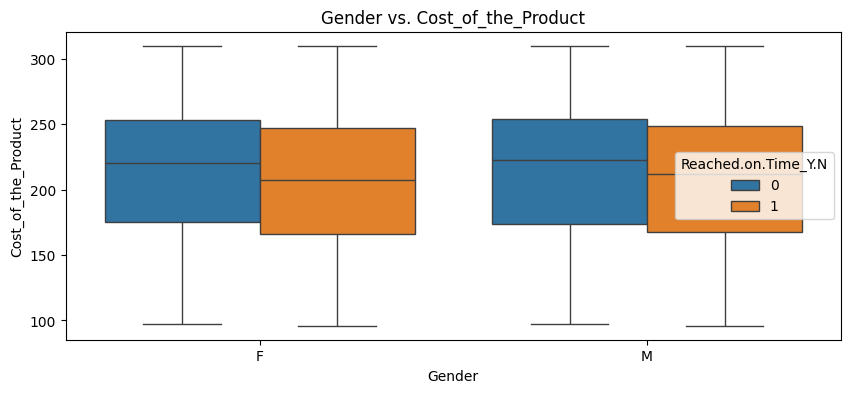

In [7]:
# Bivariate Analysis
plt.figure(figsize=(12, 8))
correlation_matrix = data[numerical_features].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

for feature in numerical_features:
    plt.figure(figsize=(10, 4))
    sns.scatterplot(x=feature, y='Cost_of_the_Product', hue='Reached.on.Time_Y.N', data=data)
    plt.title(f'{feature} vs. Cost_of_the_Product')
    plt.show()

for feature in categorical_features:
    plt.figure(figsize=(10, 4))
    sns.boxplot(x=feature, y='Cost_of_the_Product', hue='Reached.on.Time_Y.N', data=data)
    plt.title(f'{feature} vs. Cost_of_the_Product')
    plt.show()

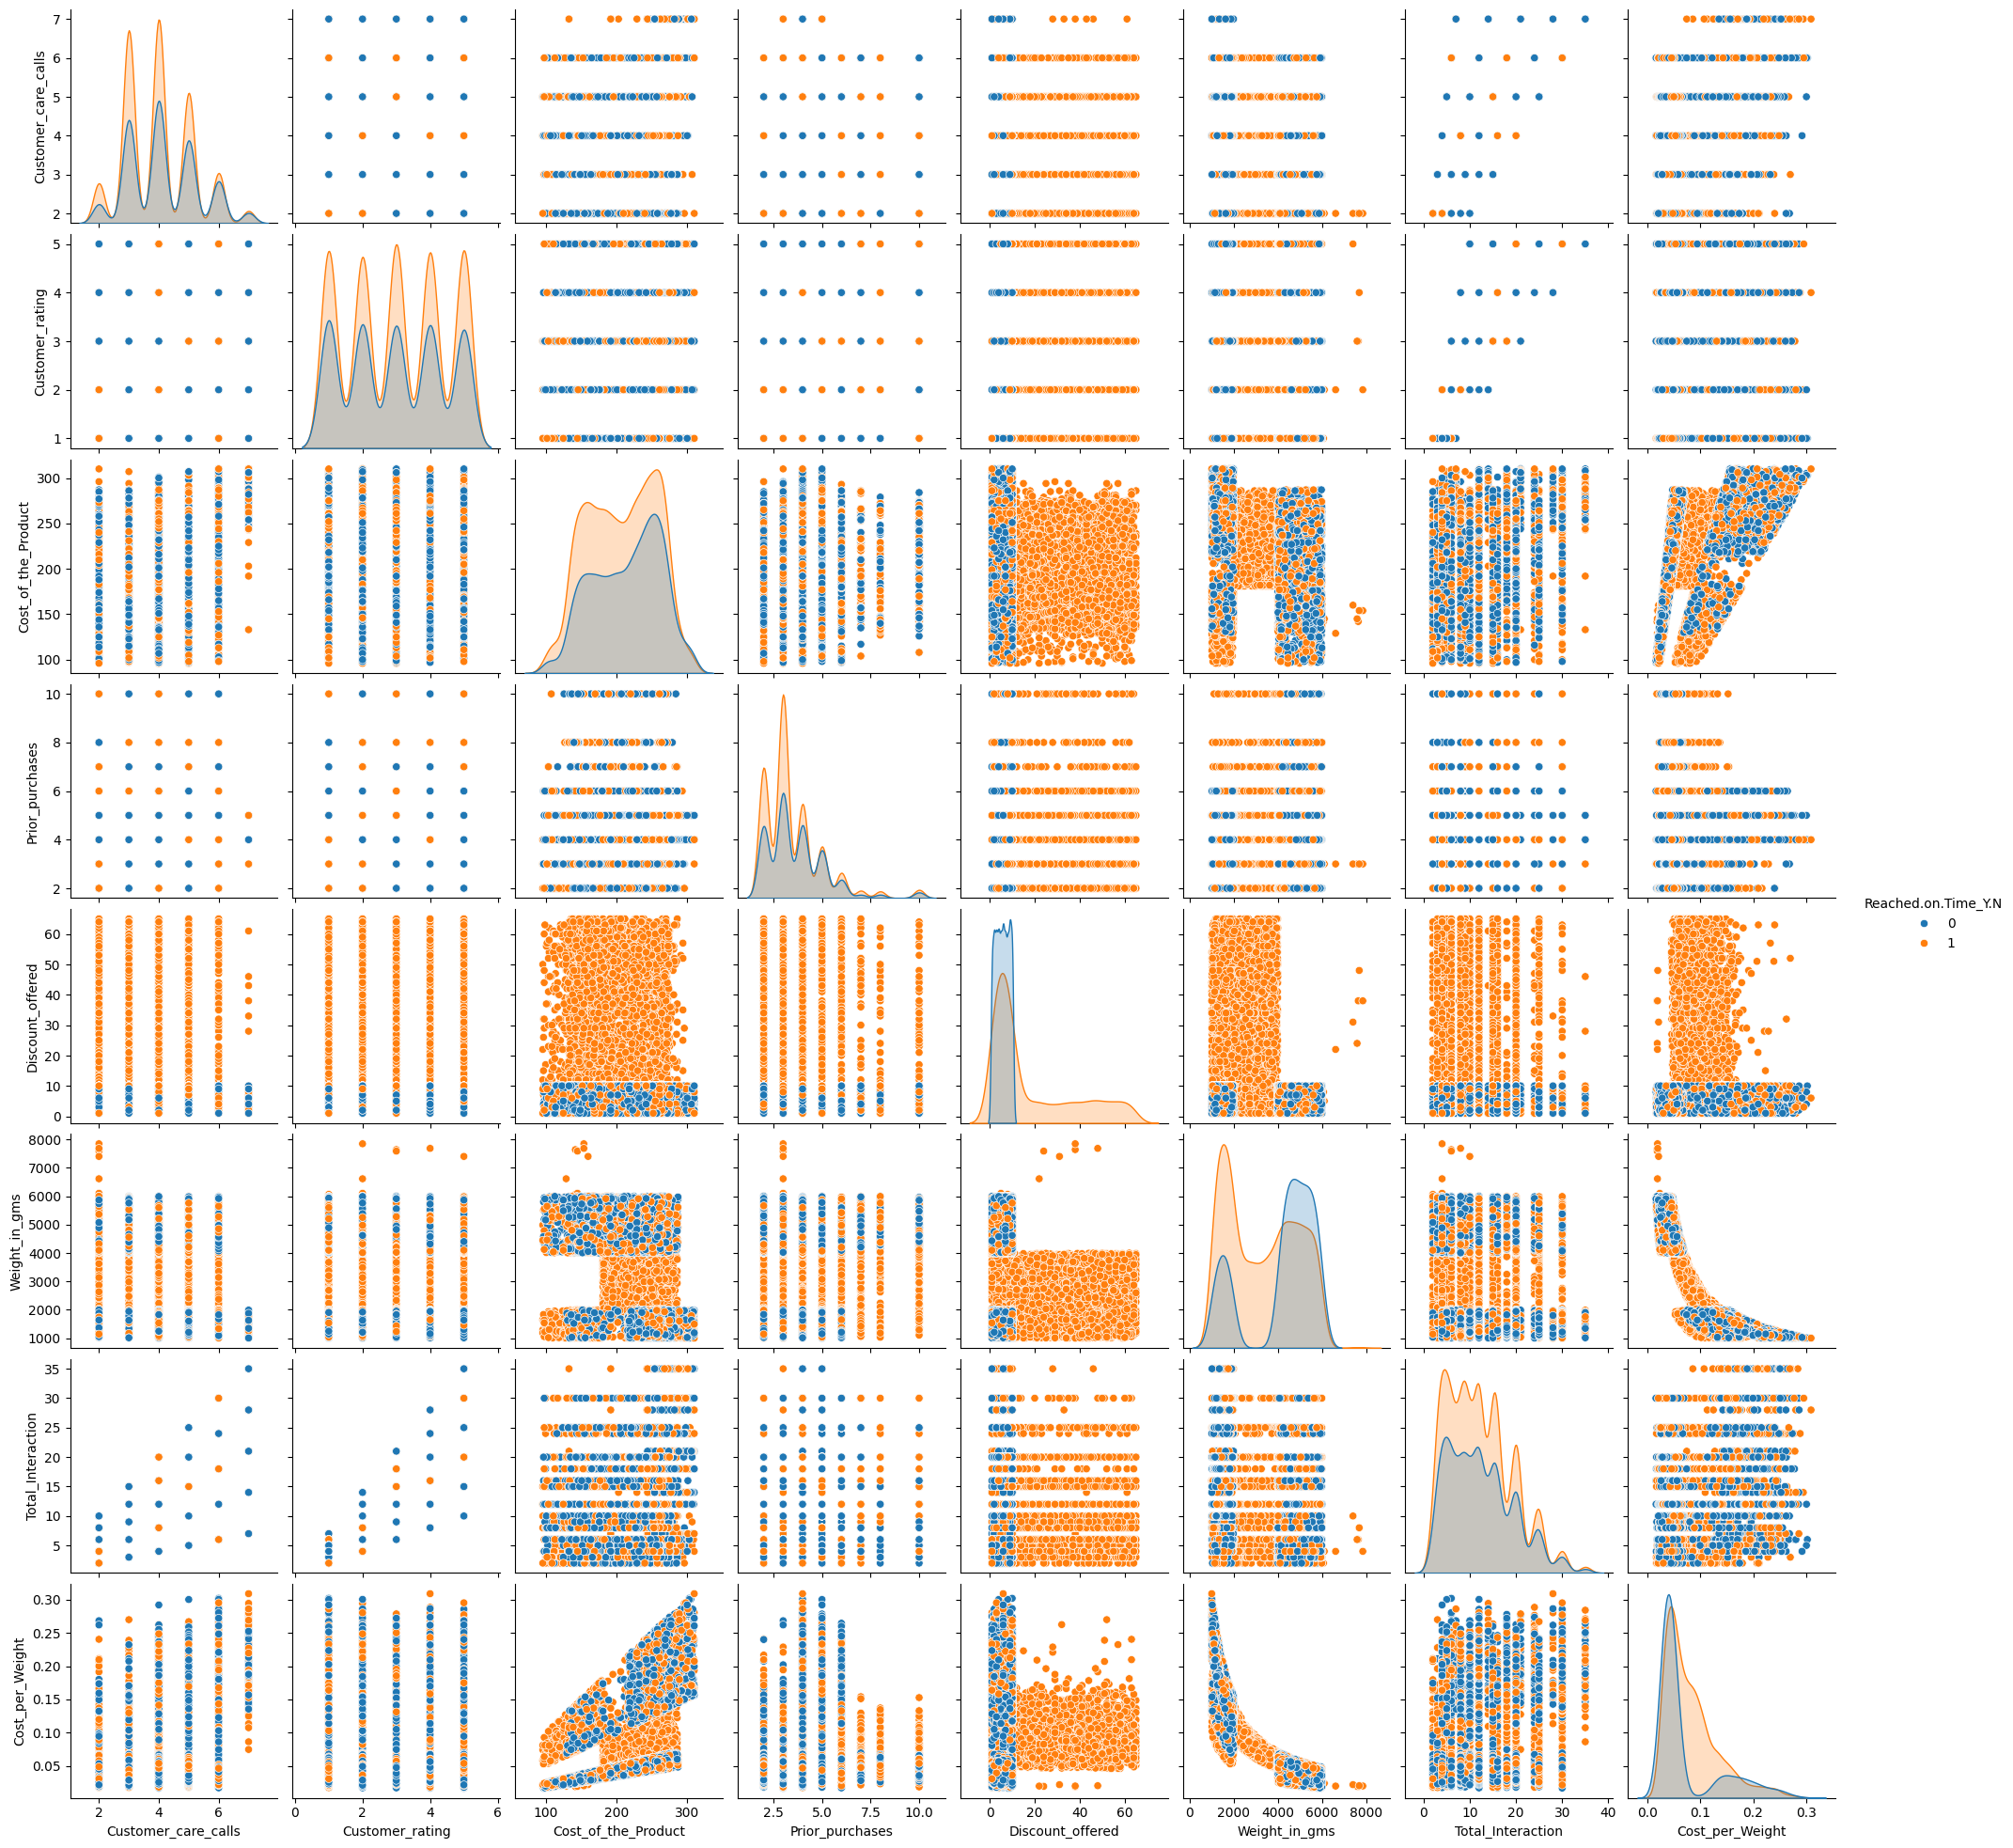

Outliers detected: (array([   36,    60,    62,   111,   122,   143,   158,   159,   173,
         182,   191,   217,   226,   228,   240,   262,   276,   293,
         295,   335,   342,   343,   357,   358,   364,   388,   391,
         407,   417,   453,   474,   488,   511,   517,   571,   596,
         618,   624,   631,   641,   655,   668,   687,   695,   714,
         740,   745,   767,   776,   790,   797,   847,   855,   856,
         865,   869,   889,   894,   904,   909,   910,   919,   943,
         944,   953,   956,   961,   977,  1004,  1015,  1025,  1049,
        1060,  1061,  1062,  1065,  1145,  1145,  1150,  1152,  1153,
        1179,  1184,  1186,  1187,  1201,  1204,  1206,  1216,  1236,
        1252,  1262,  1264,  1270,  1274,  1302,  1308,  1318,  1328,
        1366,  1449,  1484,  1498,  1507,  1512,  1550,  1581,  1582,
        1593,  1596,  1616,  1620,  1625,  1630,  1647,  1653,  1655,
        1656,  1684,  1720,  1726,  1747,  1765,  1778,  1809,  1817,


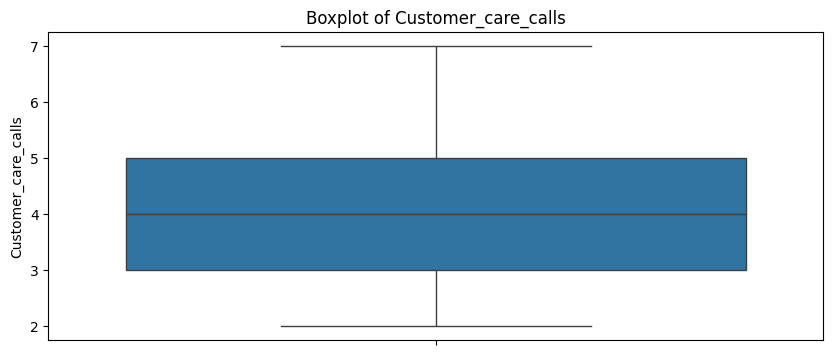

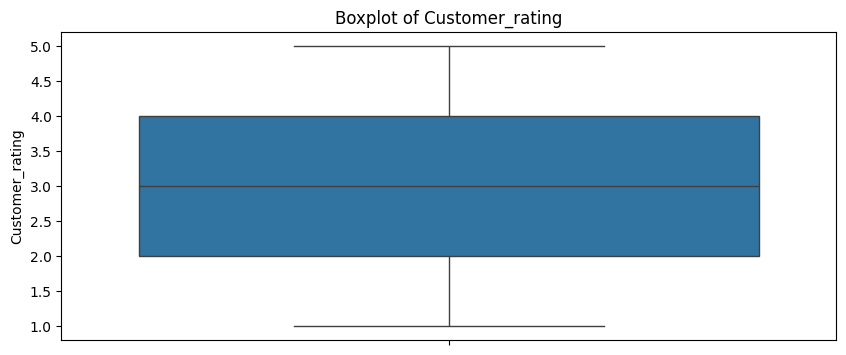

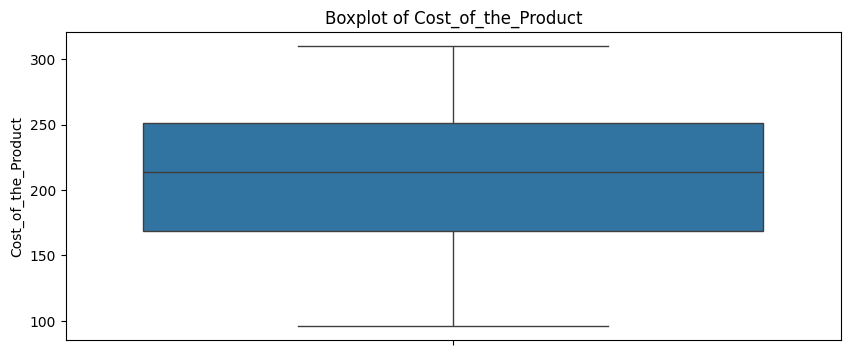

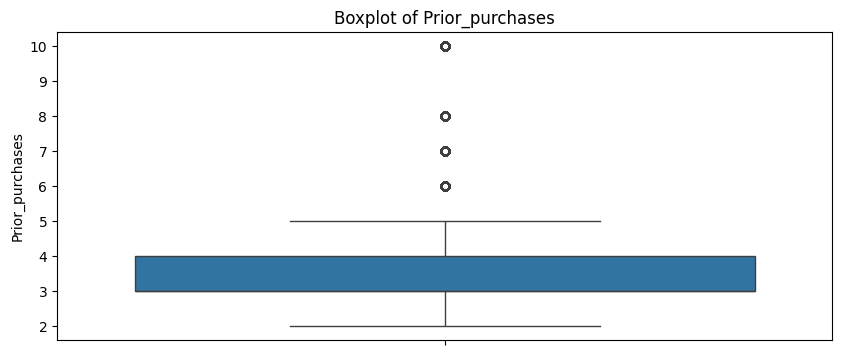

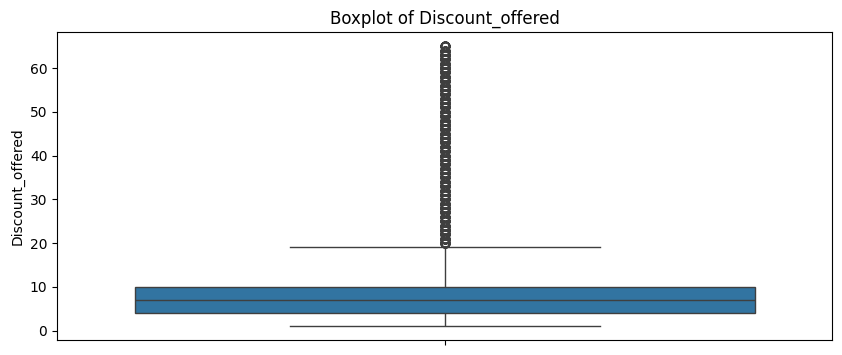

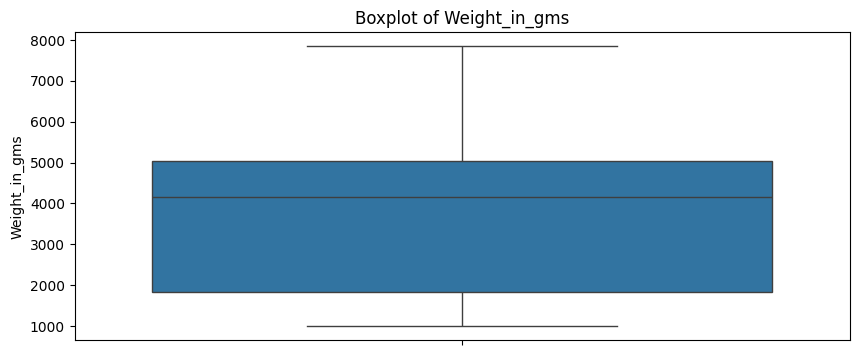

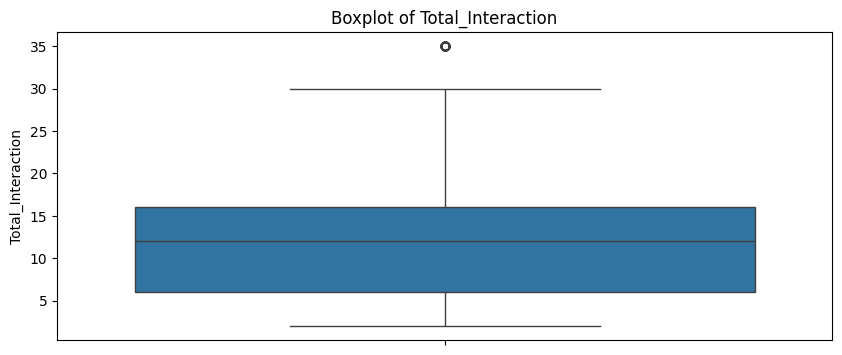

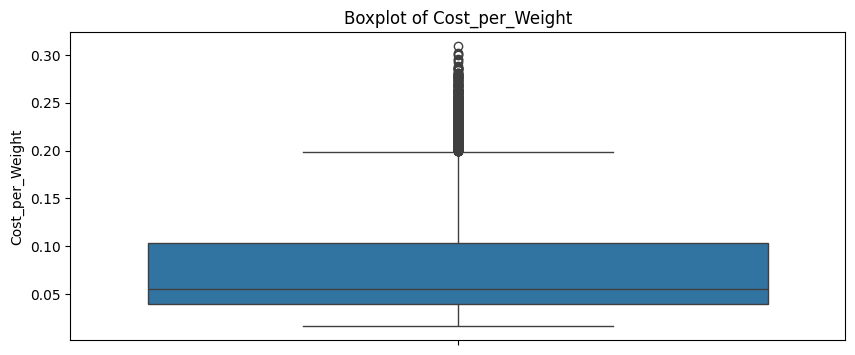

In [8]:
# Multivariate Analysis
sns.pairplot(data[numerical_features + ['Reached.on.Time_Y.N']], hue='Reached.on.Time_Y.N')
plt.show()

# Outliers and Anomalies
z_scores = np.abs(stats.zscore(data[numerical_features]))
outliers = np.where(z_scores > 3)
print("Outliers detected:", outliers)

for feature in numerical_features:
    plt.figure(figsize=(10, 4))
    sns.boxplot(data[feature])
    plt.title(f'Boxplot of {feature}')
    plt.show()

data_cleaned = data[(z_scores < 3).all(axis=1)]